In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)

# Firstview

In [4]:
df = pd.read_csv('/Users/rajathadri_as/Documents/mod_content.csv')

In [5]:
df.head()

,Id,Adref,Message,ModeratorUsername,DateLogged,ModerationAction,SiteId,ActionRequired,PointerId,ContentType,ScamCaseId
0,16497766,FF344500D,Advert requires Manual Moderation,{auto-moderator},2024-01-01 00:13:53,4,3,1,2957648,1,NaN
1,16497799,FF352A075,Advert requires Manual Moderation,{auto-moderator},2024-01-01 01:26:20,4,3,1,3036547,1,NaN
2,16497802,HT352A9CF,Advert requires Manual Moderation,{auto-moderator},2024-01-01 01:49:58,4,13,1,3042499,1,NaN
3,16497808,HM401697C,Advert requires Manual Moderation,{auto-moderator},2024-01-01 03:06:08,4,12,1,3042502,1,NaN
4,16497811,FF3298A3A,Advert requires Manual Moderation,{auto-moderator},2024-01-01 03:17:27,4,3,1,2763413,1,NaN


In [6]:
df.shape

(137390, 11)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,137390.0,1.716952e+07,381219.090941,16497766.0,16842589.75,17176541.5,17497745.5,17823949.0
ModerationAction,137390.0,4.000000e+00,0.000000,4.0,4.00,4.0,4.0,4.0
SiteId,137390.0,8.089759e+00,6.326796,3.0,3.00,8.0,12.0,33.0
ActionRequired,137390.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.0,1.0
PointerId,137390.0,3.175987e+06,211016.850808,378415.0,3097487.75,3210763.0,3321868.0,3446074.0
ContentType,137390.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.0,1.0
ScamCaseId,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Id                        0
Adref                     0
Message                   0
ModeratorUsername         0
DateLogged                0
ModerationAction          0
SiteId                    0
ActionRequired            0
PointerId                 0
ContentType               0
ScamCaseId           137390
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137390 entries, 0 to 137389
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 137390 non-null  int64  
 1   Adref              137390 non-null  object 
 2   Message            137390 non-null  object 
 3   ModeratorUsername  137390 non-null  object 
 4   DateLogged         137390 non-null  object 
 5   ModerationAction   137390 non-null  int64  
 6   SiteId             137390 non-null  int64  
 7   ActionRequired     137390 non-null  int64  
 8   PointerId          137390 non-null  int64  
 9   ContentType        137390 non-null  int64  
 10  ScamCaseId         0 non-null       float64
dtypes: float64(1), int64(6), object(4)
memory usage: 11.5+ MB


# Data Wrangling

In [10]:
df = df[['Id','Adref','DateLogged','SiteId']]

In [11]:
df.head()

,Id,Adref,DateLogged,SiteId
0,16497766,FF344500D,2024-01-01 00:13:53,3
1,16497799,FF352A075,2024-01-01 01:26:20,3
2,16497802,HT352A9CF,2024-01-01 01:49:58,13
3,16497808,HM401697C,2024-01-01 03:06:08,12
4,16497811,FF3298A3A,2024-01-01 03:17:27,3


In [12]:
df['DateLogged'] = pd.to_datetime(df['DateLogged'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137390 entries, 0 to 137389
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          137390 non-null  int64         
 1   Adref       137390 non-null  object        
 2   DateLogged  137390 non-null  datetime64[ns]
 3   SiteId      137390 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [14]:
df['DayOfWeek'] = df['DateLogged'].dt.day_name()
df['HourOfDay'] = df['DateLogged'].dt.hour
df['MinOfDay'] = df['DateLogged'].dt.minute

In [15]:
df.head()

,Id,Adref,DateLogged,SiteId,DayOfWeek,HourOfDay,MinOfDay
0,16497766,FF344500D,2024-01-01 00:13:53,3,Monday,0,13
1,16497799,FF352A075,2024-01-01 01:26:20,3,Monday,1,26
2,16497802,HT352A9CF,2024-01-01 01:49:58,13,Monday,1,49
3,16497808,HM401697C,2024-01-01 03:06:08,12,Monday,3,6
4,16497811,FF3298A3A,2024-01-01 03:17:27,3,Monday,3,17


In [16]:
df['log'] = 1

In [17]:
df['log'].describe()

count    137390.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: log, dtype: float64

In [18]:
logs_per_hour = df.groupby(['DayOfWeek', 'HourOfDay']).size().reset_index(name='LogsCount')

In [19]:
logs_per_hour

,DayOfWeek,HourOfDay,LogsCount
0,Friday,0,222
1,Friday,1,138
2,Friday,2,109
3,Friday,3,186
4,Friday,4,287
5,Friday,5,371
6,Friday,6,760
7,Friday,7,926
8,Friday,8,981
9,Friday,9,1331


In [20]:
# logs_per_hour_sorted = logs_per_hour.sort_values(by=['DayOfWeek', 'HourOfDay'])

In [21]:
# logs_per_hour_sorted

In [22]:
logs_per_hour.to_clipboard(excel=True)

In [23]:
log_per_min = df.groupby(['DayOfWeek', 'HourOfDay','MinOfDay'])['log'].size().reset_index(name='AverageLogs')

In [24]:
log_per_min

,DayOfWeek,HourOfDay,MinOfDay,AverageLogs
0,Friday,0,0,2
1,Friday,0,1,4
2,Friday,0,2,3
3,Friday,0,3,5
4,Friday,0,4,4
5,Friday,0,5,3
6,Friday,0,6,11
7,Friday,0,7,5
8,Friday,0,8,3
9,Friday,0,9,1


In [25]:
hourly_avg_logs = log_per_min.groupby(['DayOfWeek', 'HourOfDay'])['AverageLogs'].mean().reset_index(name='AverageLogsPerMin')

In [26]:
hourly_avg_logs['AverageLogsPerMin'] = hourly_avg_logs['AverageLogsPerMin']/36

In [27]:
hourly_avg_logs

,DayOfWeek,HourOfDay,AverageLogsPerMin
0,Friday,0,0.108187
1,Friday,1,0.072327
2,Friday,2,0.061791
3,Friday,3,0.090643
4,Friday,4,0.135122
5,Friday,5,0.174670
6,Friday,6,0.351852
7,Friday,7,0.428704
8,Friday,8,0.454167
9,Friday,9,0.616204


In [28]:
hourly_avg_logs.to_clipboard(excel=True)

# Visualization

In [29]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

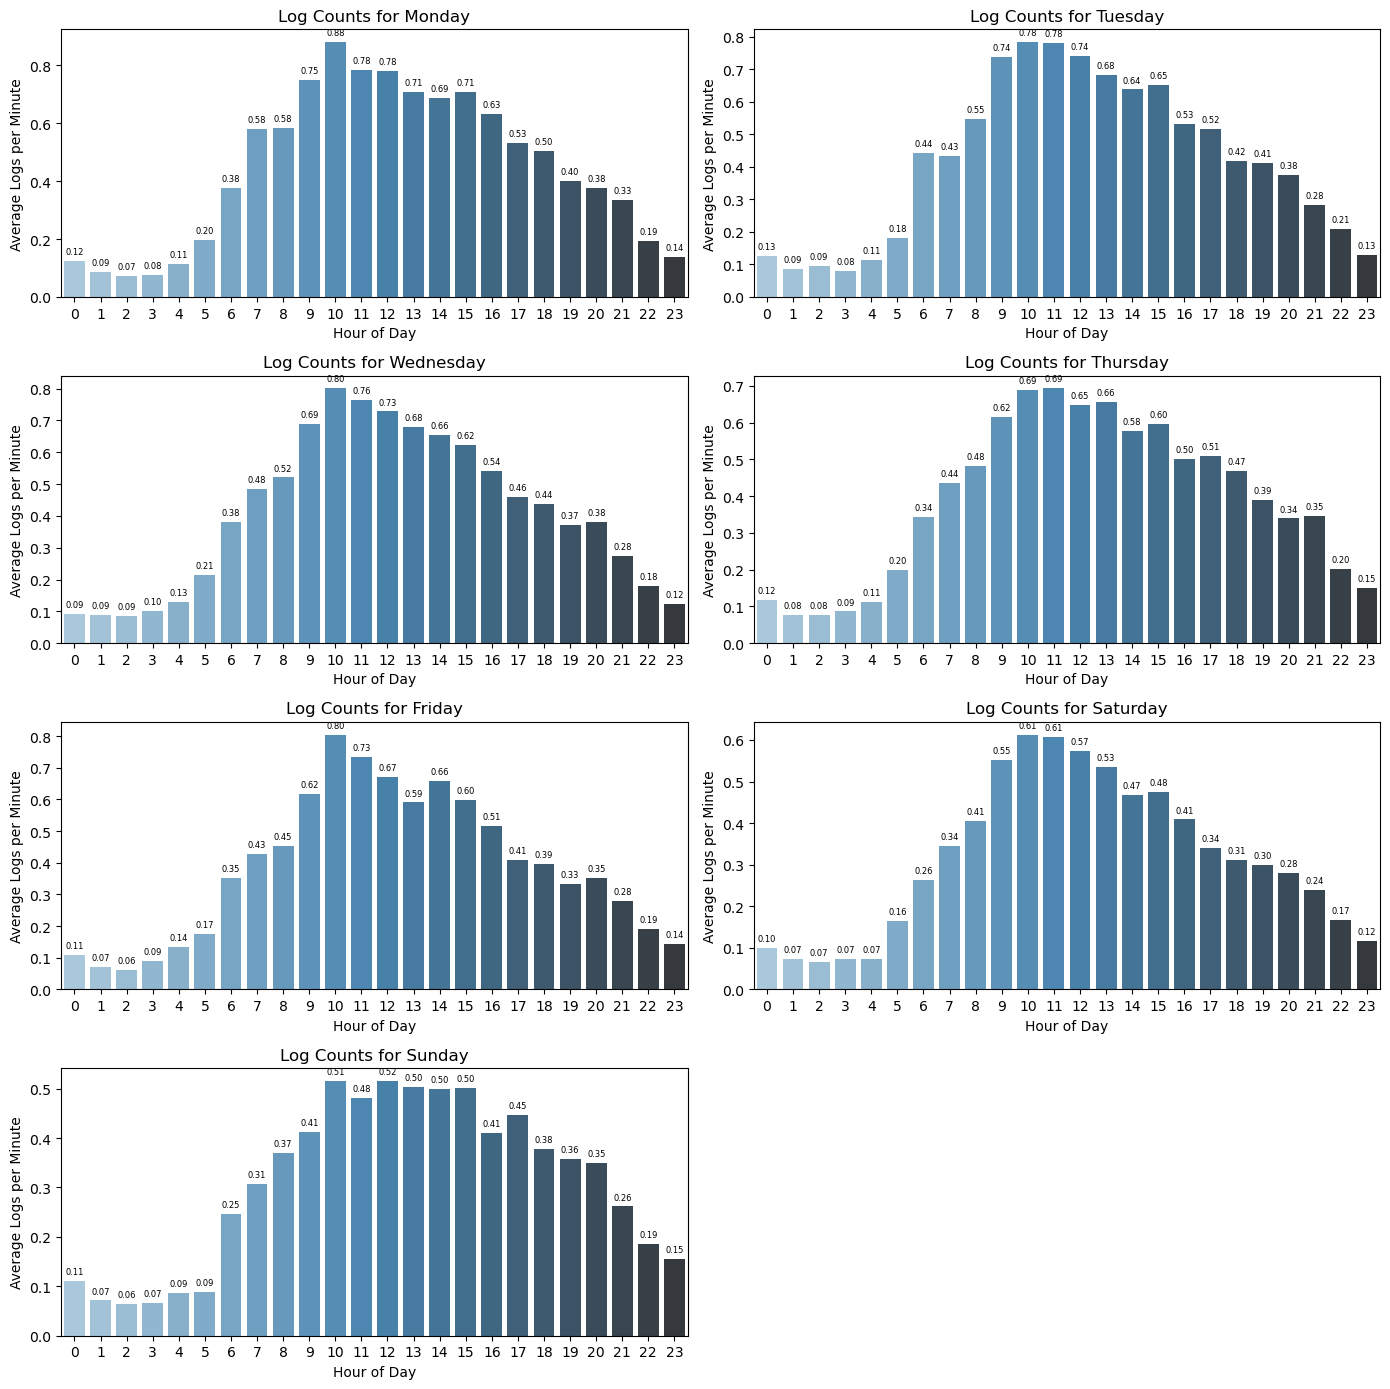

In [30]:
plt.figure(figsize=(14, 14))
for i, day in enumerate(days_order):
    plt.subplot(4, 2, i + 1)
    day_data = hourly_avg_logs[hourly_avg_logs['DayOfWeek'] == day]
    ax = sns.barplot(x='HourOfDay', y='AverageLogsPerMin', data=day_data, palette='Blues_d')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    plt.title(f'Log Counts for {day}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Logs per Minute')

plt.tight_layout()
plt.savefig("AvgLogPlots.jpg")
plt.show()

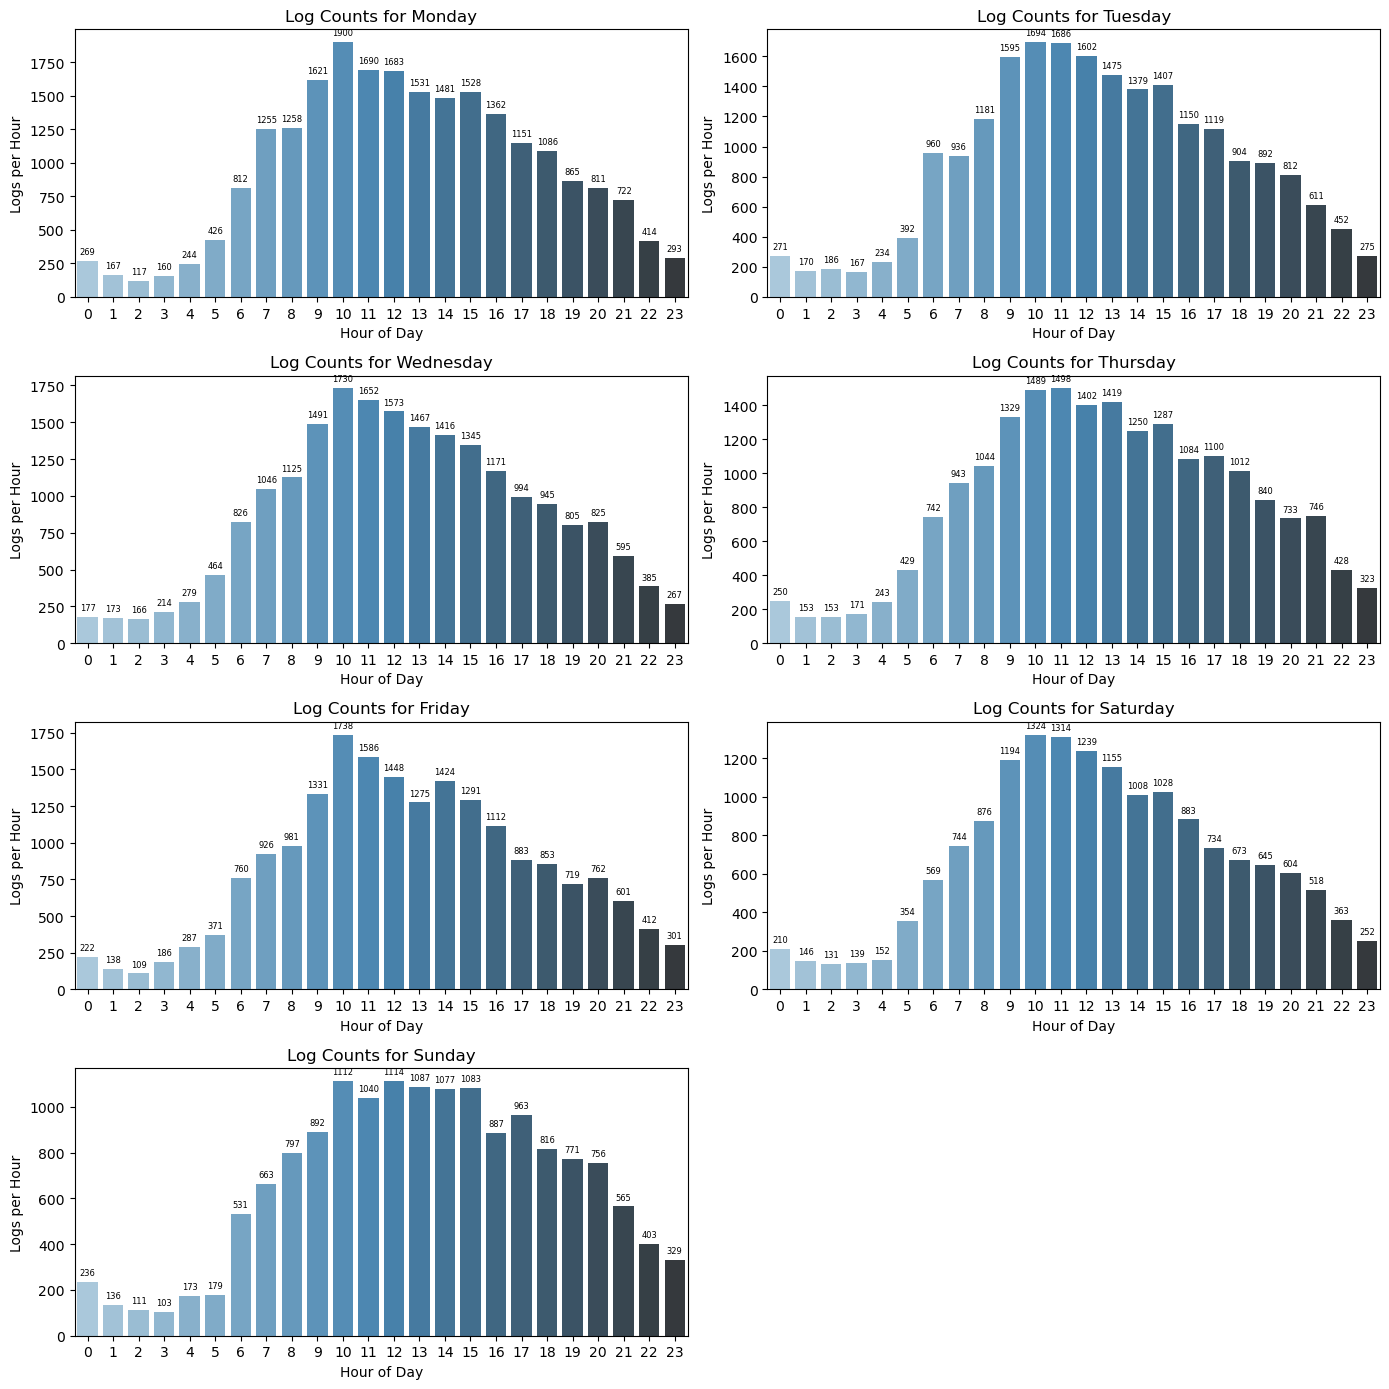

In [31]:
plt.figure(figsize=(14, 14))
for i, day in enumerate(days_order):
    plt.subplot(4, 2, i + 1)
    day_data = logs_per_hour[logs_per_hour['DayOfWeek'] == day]
    ax = sns.barplot(x='HourOfDay', y='LogsCount', data=day_data, palette='Blues_d')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    plt.title(f'Log Counts for {day}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Logs per Hour')

plt.tight_layout()
plt.savefig("LogPlots.jpg")
plt.show()